# Atividade 7

Função para transformada de furier, obter um filtro passa-baixa ideal e passa-alta ideal, realizar um estudo do tamanho do raio. Após isso realizar a transformada inversa para voltar a imagem no domínio espacial.

### importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from PIL import Image

%matplotlib inline

### Funções utilizadas

In [26]:
# Furier transform 
def F(img): ## y = v (N), x = u (M)
    N, M = img.shape
    Fs = np.zeros(img.shape, dtype='complex') 

    for u in range(M):
        for v in range(N):
            soma = 0
            for x in range(M):
                for y in range(N):
                    soma += img[y,x] * np.exp(- 1j * np.pi * 2 * ((u * x)/M + (v * y)/N))

            Fs[v][u] = soma / M / N
    return(Fs)

# Furier transform 
def F2(img): ## y = v (N), x = u (M)
    N, M = img.shape
    Fs = np.zeros(img.shape, dtype='complex') 

    for u in range(M):
        for v in range(N):
            soma = 0
            x = np.array(range(M))
            k = np.array([np.exp(- 1j * np.pi * 2 * ((u * x)/M + (v * yi)/N)) for yi in range(N)])
            a = np.sum(img * k) / (M * N)

            Fs[v][u] = a
    return(Fs)

# Furier inverse
def invF(Fs):
    N, M = Fs.shape
    img2 = np.zeros(Fs.shape) 

    for x in range(M):
        for y in range(N):
            soma = 0
            u = np.array(range(M))
            v = np.array(range(N))
            k = np.array([np.exp(1j * np.pi * 2 * ((u * x)/M + (vi * y)/N)) for vi in v])
            soma = np.sum(Fs * k)

            img2[y,x] = int(soma.real)
    
    return img2

# distance
def dist(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# High-pass filter
def hpFilter(radius, img):
    ImgOut = np.ones(img.shape)
    rows, cols = img.shape
    
    for y in range(rows):
        for x in range(cols):
            if dist((y,x), (rows/2,cols/2)) < radius:
                ImgOut[y,x] = 0
    return ImgOut

# -pass filter
def lpFilter(radius, img):
    ImgOut = np.ones(img.shape)
    rows, cols = img.shape
    
    for y in range(rows):
        for x in range(cols):
            if dist((y,x), (rows/2,cols/2)) > radius:
                ImgOut[y,x] = 0
    return ImgOut
    

# magnitude Furier
def magnitude(X):
    Imag = np.sqrt((X.real**2) + (X.imag**2))
    
    return Imag


### Principal

Time = 0.0010311603546142578


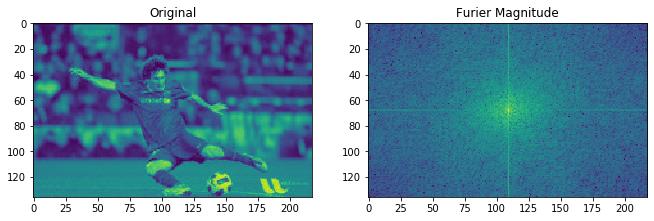

In [57]:
#read the image
img = cv2.imread('test images/messi2.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)

start_time = time.time()
signal_furier = F2(img)
print("Time = %s" % (time.time() - start_time))

# Shift signal
signal_shift = np.fft.fftshift(signal_furier)

# get magnitude
Imag = magnitude(signal_shift)

# Logarithm
ImagL = 20*np.log(Imag)


fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)

fig.add_subplot(1,2,1, title='Original')
plt.imshow(img)

fig.add_subplot(1,2,2, title='Furier Magnitude')
plt.imshow(ImagL)


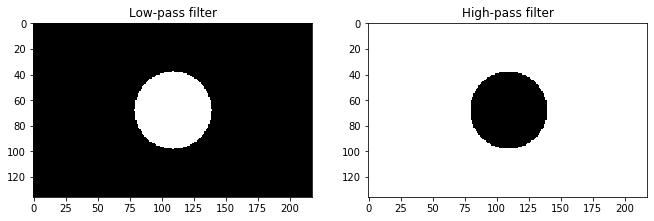

In [34]:
# exemplo de obtenção dos filtros
filterLP = lpFilter(30, img)
filterHP = hpFilter(30, img)

fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)

fig.add_subplot(1,2,1, title='Low-pass filter')
plt.imshow(filterLP, cmap='gray')

fig.add_subplot(1,2,2, title='High-pass filter')
plt.imshow(filterHP, cmap='gray')

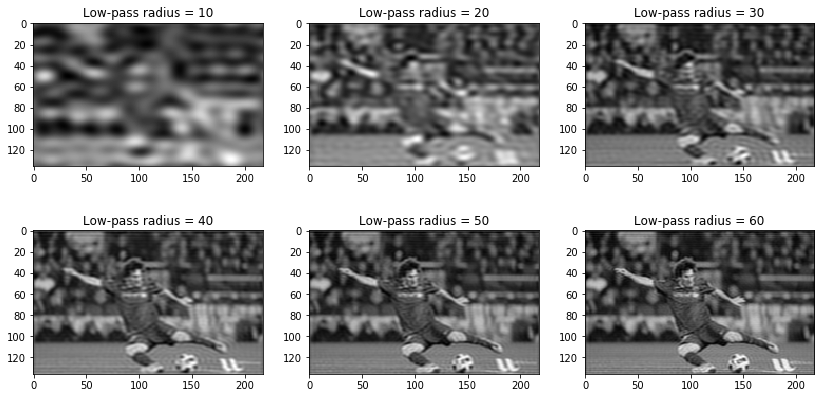

In [55]:
# radius variation for low-pass filter

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(14)

for i in range(1,7):
    radius = 10*i
    
    # get low-pass filter mask and apply to shift signal
    filterLP = lpFilter(radius, img)
    signalF_shift = filterLP * signal_shift
    
    # remove the shift
    signalF = np.fft.ifftshift(signalF_shift)
    
    # furier invese
    imgOut = invF(signalF)

    fig.add_subplot(2,3,i, title='Low-pass radius = %s' % radius)
    plt.imshow(imgOut, cmap='gray')
    

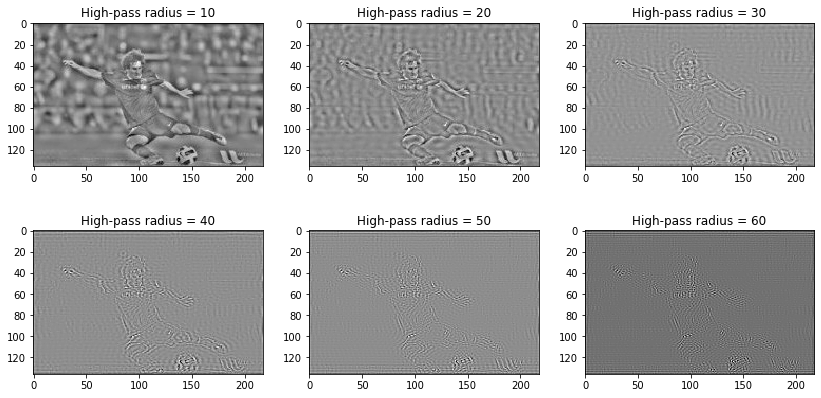

In [56]:
# radius variation for high-pass filter

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(14)

for i in range(1,7):
    radius = 10*i
    
    # get high-pass filter mask and apply to shift signal
    filterHP = hpFilter(radius, img)
    signalF_shift = filterHP * signal_shift
    
    # remove the shift
    signalF = np.fft.ifftshift(signalF_shift)
    
    # furier invese
    imgOut = invF(signalF)

    fig.add_subplot(2,3,i, title='High-pass radius = %s' % radius)
    plt.imshow(imgOut, cmap='gray')